In [1]:
import sympy as sm
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import timeit

In [2]:
def RCP (t, u, r1, q1, aC1, eC1, hC1, mC1, aP1, eP1, mP1, hP1): 
    
    du = np.zeros([4, 1])
    
    #variables
    R = u[0]
    C = u[1]
    P = u[2]

    
    du[0] = r1*R*(1 - (R*q1)) - (aC1*R*C)/(1 + (aC1*hC1*R))
    du[1] = (eC1*aC1*R*C)/(1 + (aC1*hC1*R)) - (aP1*C*P)/(1+ (aP1*hP1*C)) - mC1*C
    du[2] = (eP1*aP1*C*P)/(1+ (aP1*hP1*C)) - mP1*P
    du[3] = 1
    
    du = du.reshape(4,)
    return(du)

In [3]:
rv = np.arange(0.5, 6.1, 1)
aCv = np.arange(0.05, 0.81, 0.2)
eCv = np.arange(0.05, 0.81, 0.2)
mCv = np.arange(0.05, 0.91, 0.2)
hCv = np.arange(0.1, 0.81, 0.2)
aPv = np.arange(0.05, 0.81, 0.2)
ePv = np.arange(0.05, 0.81, 0.2)
mPv = np.arange(0.05, 0.91, 0.2)
hPv = np.arange(0.1, 0.81, 0.2)

import itertools as itr
import pandas as pd

par = list(itr.product(rv,aCv,eCv,mCv,hCv,aPv,ePv,mPv,hPv))
pardf = pd.DataFrame(par,columns=("r","aC","eC","mC","hC","aP","eP","mP","hP"))


In [4]:
rv

array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5])

In [5]:
i=245002

r0 = par[i][0]; q0 = (1/30000)
aC0 = par[i][1]; eC0 = par[i][2]; mC0 = par[i][3]; hC0 = par[i][4]
aP0 = par[i][5]; eP0 = par[i][6]; mP0 = par[i][7]; hP0 = par[i][8]

u0 = np.array([8000, 900, 30, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(2.5,
 3.3333333333333335e-05,
 0.25,
 0.45,
 0.30000000000000004,
 0.25,
 0.45,
 0.45,
 0.05,
 0.5000000000000001)

In [20]:
##Case 2b
r0 = 2.5; q0 = (1/2300)
aC0 = 0.30; eC0 = 0.16; mC0 = 0.2; hC0 = 0.25
aP0 = 0.35; eP0 = 0.4; mP0 = 0.025; hP0 = 0.15

u0 = np.array([8000, 900, 30, 0])
p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)
p

(2.5, 0.0004347826086956522, 0.3, 0.16, 0.25, 0.2, 0.35, 0.4, 0.025, 0.15)

In [6]:
tend = 10000
t_span = (0, tend)
tint = np.linspace(0, tend, tend*100)

In [20]:
start_time = timeit.default_timer()
sll1 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
print(timeit.default_timer() - start_time)

101.42202050006017


In [21]:
start_time = timeit.default_timer()
sll2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-30)
print(timeit.default_timer() - start_time)

63.242375399917364


In [23]:
start_time = timeit.default_timer()
sll3 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-50)
print(timeit.default_timer() - start_time)

8.5740403002128


<IPython.core.display.Javascript object>


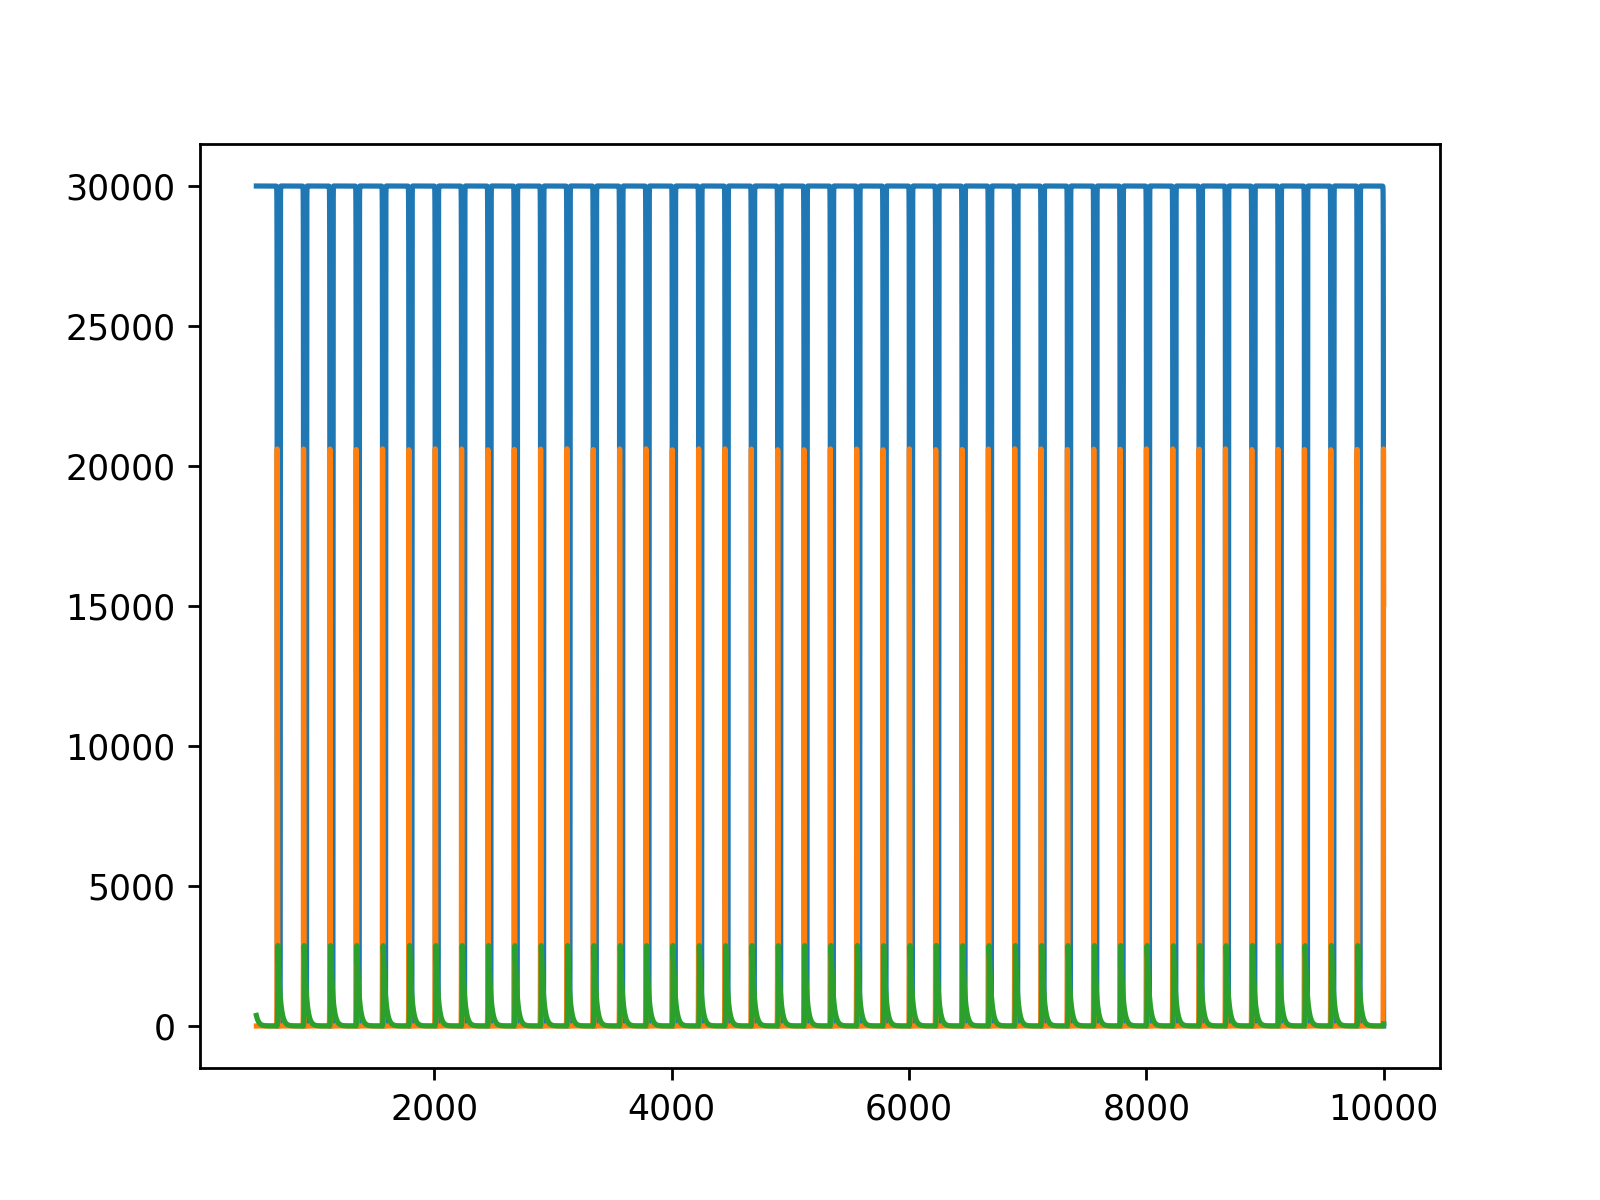

In [24]:
ssv = sll1.y[:,50000:]
np.shape(ssv)

tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


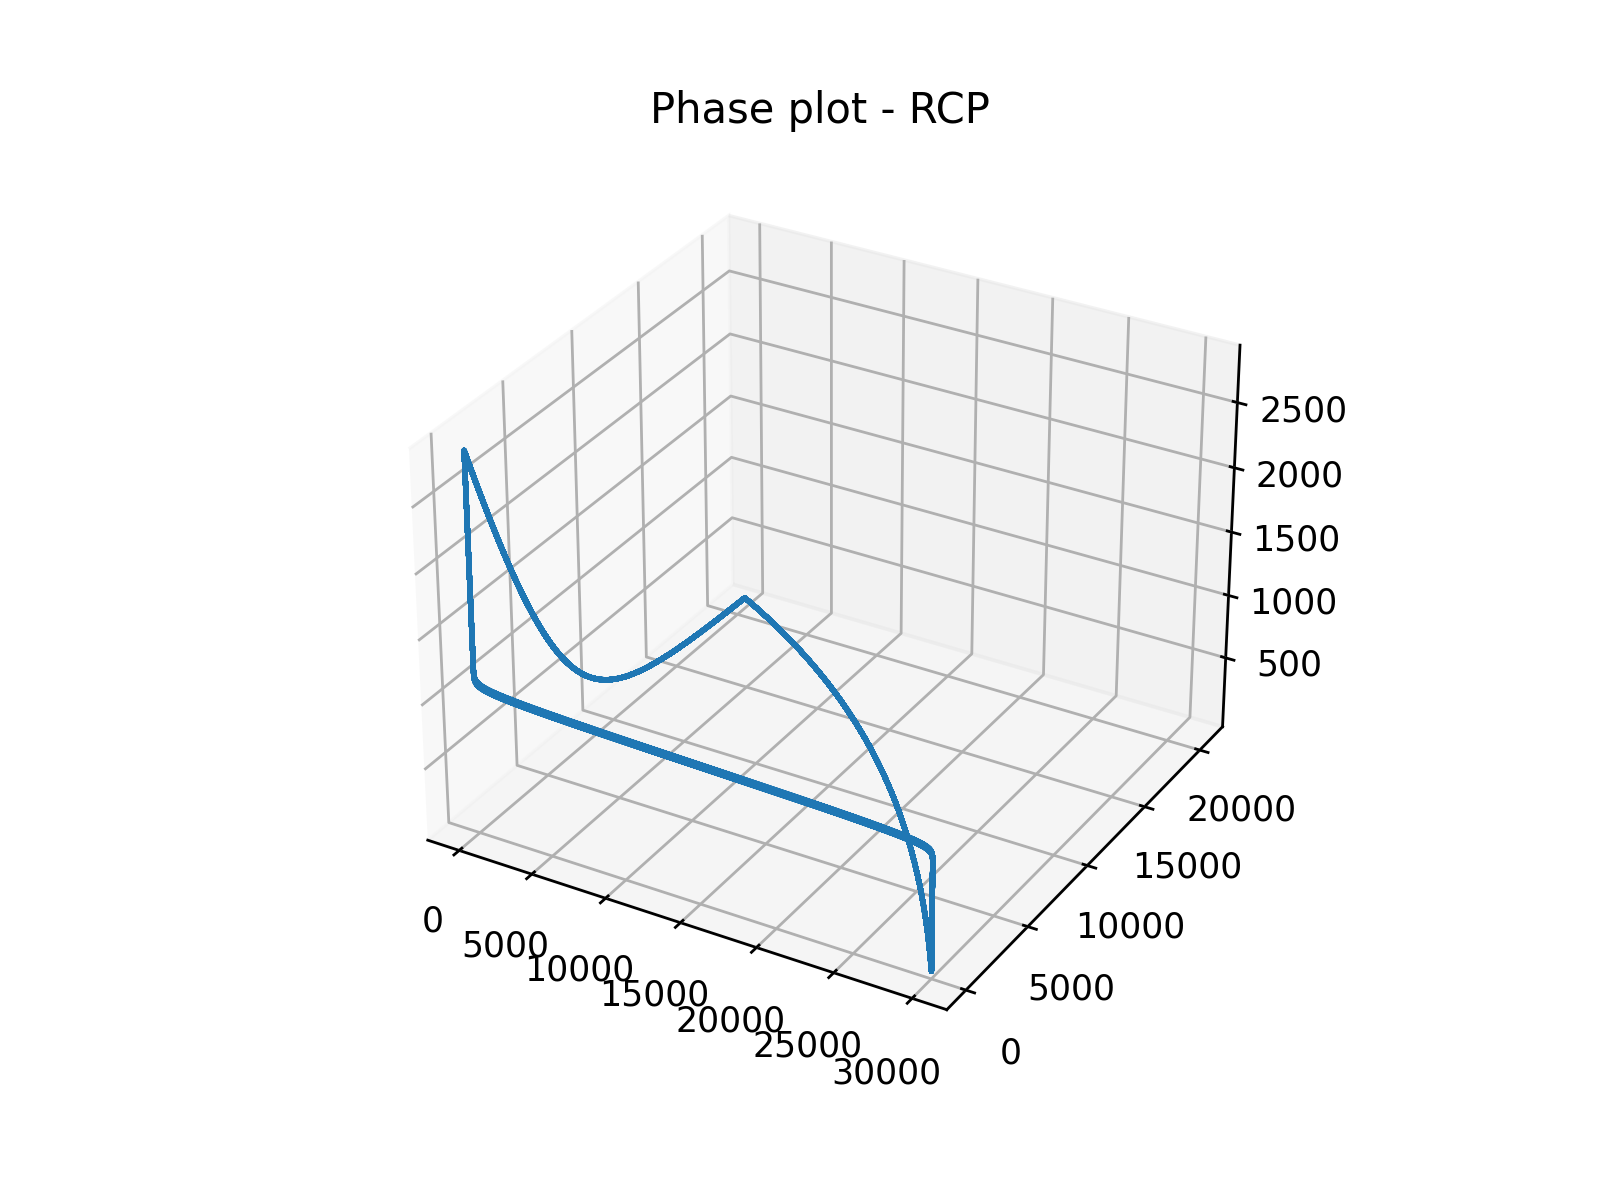

Text(0.5, 0.92, 'Phase plot - RCP')

In [25]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.set_title("Phase plot - RCP")

<IPython.core.display.Javascript object>


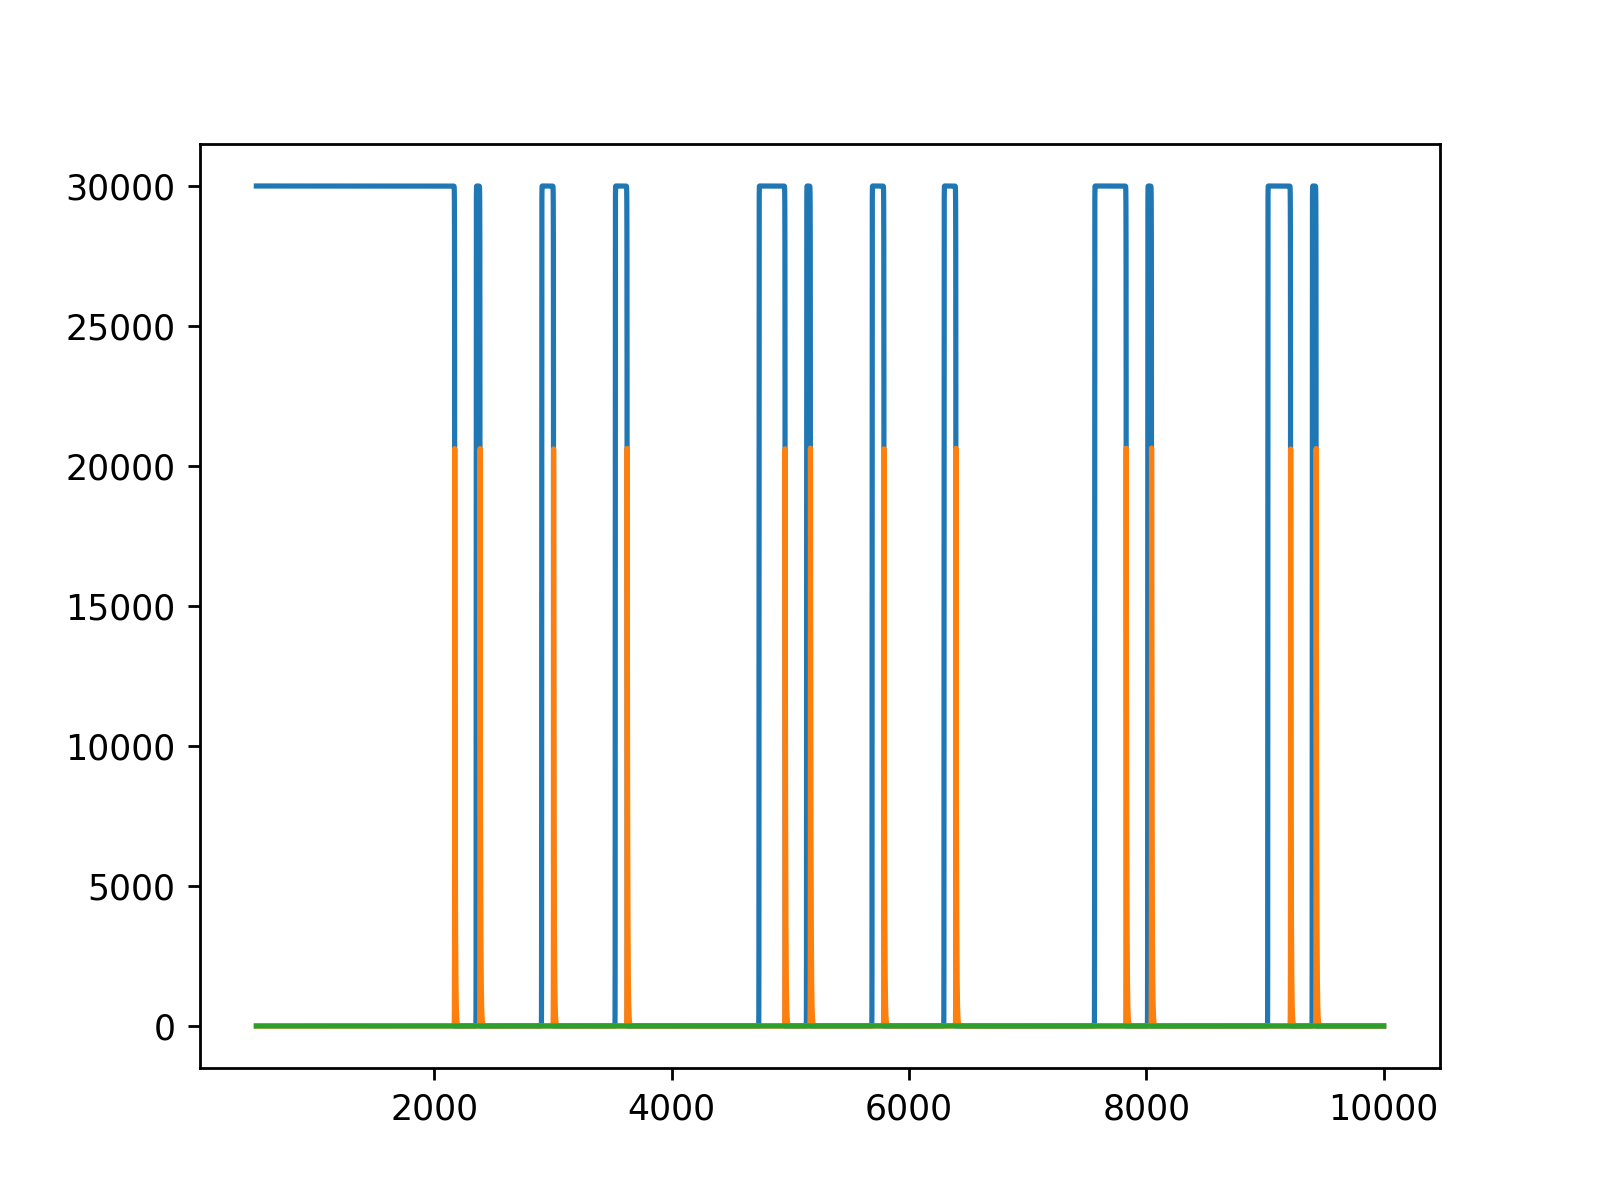

In [26]:
ssv = sll2.y[:,50000:]
np.shape(ssv)

tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


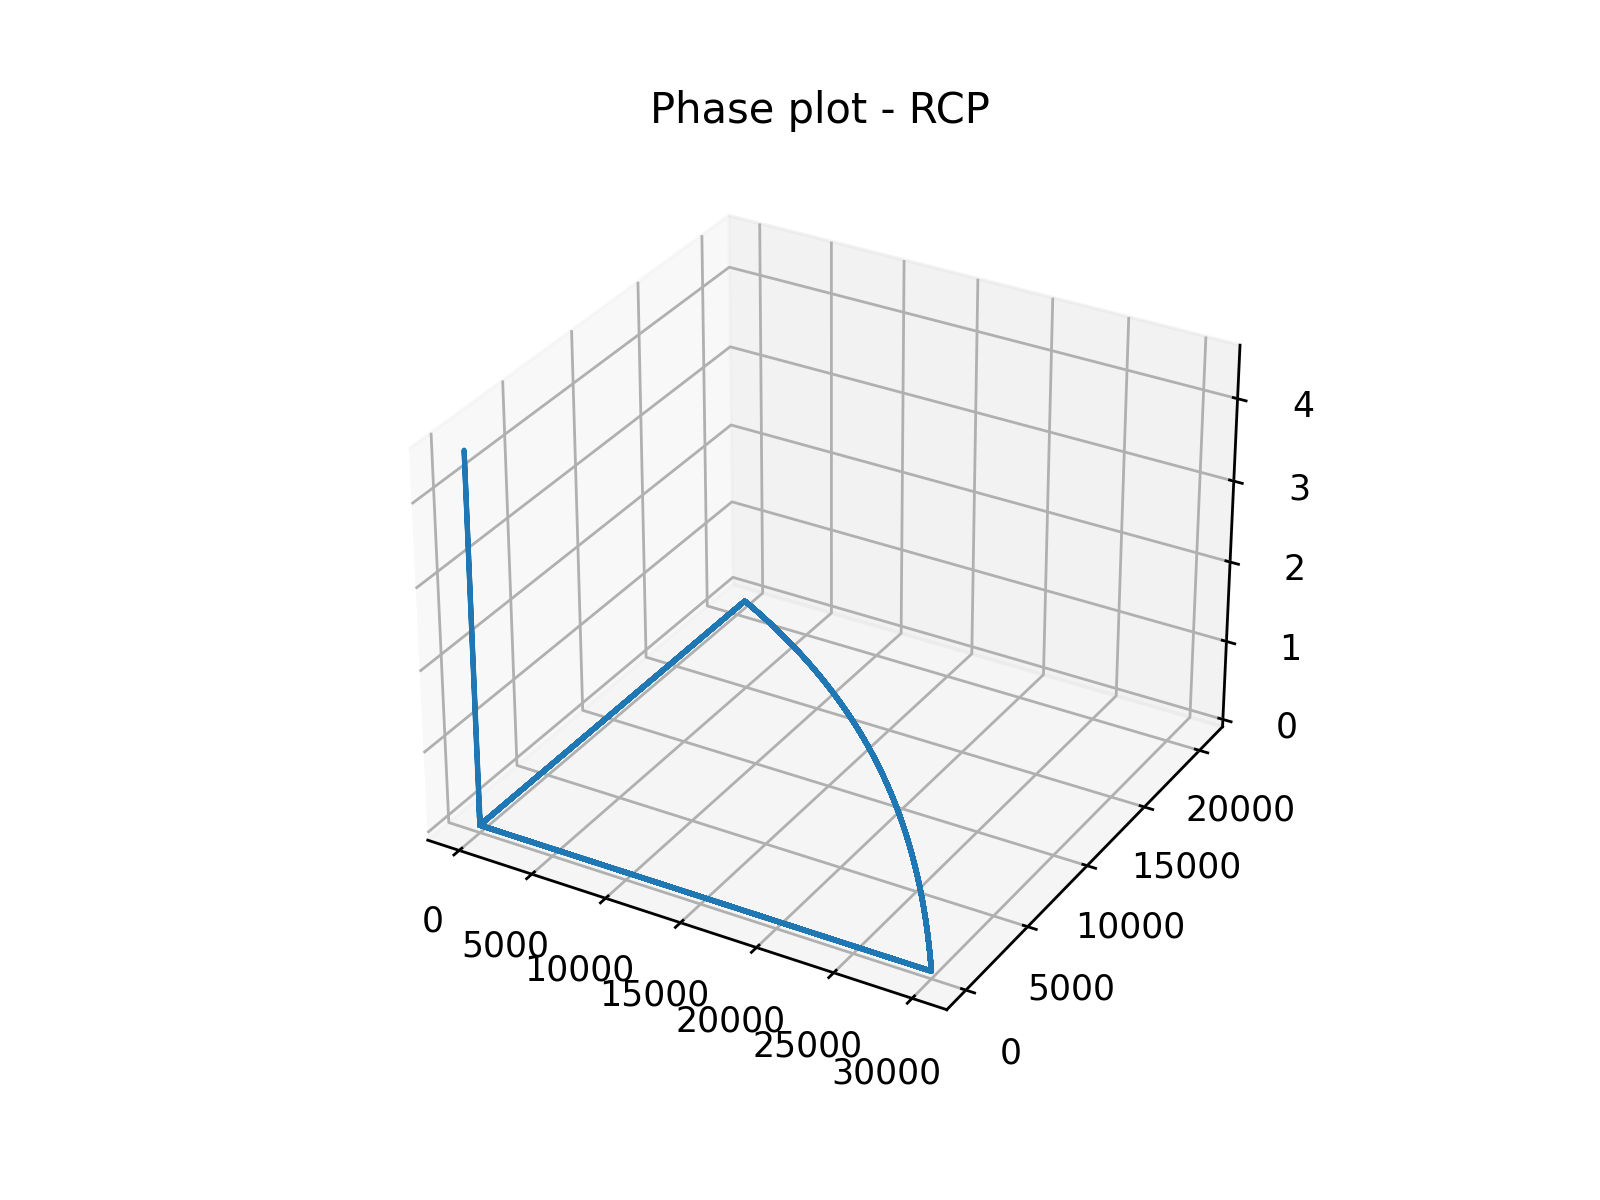

Text(0.5, 0.92, 'Phase plot - RCP')

In [27]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.set_title("Phase plot - RCP")
#fig.savefig('case3.png')

<IPython.core.display.Javascript object>


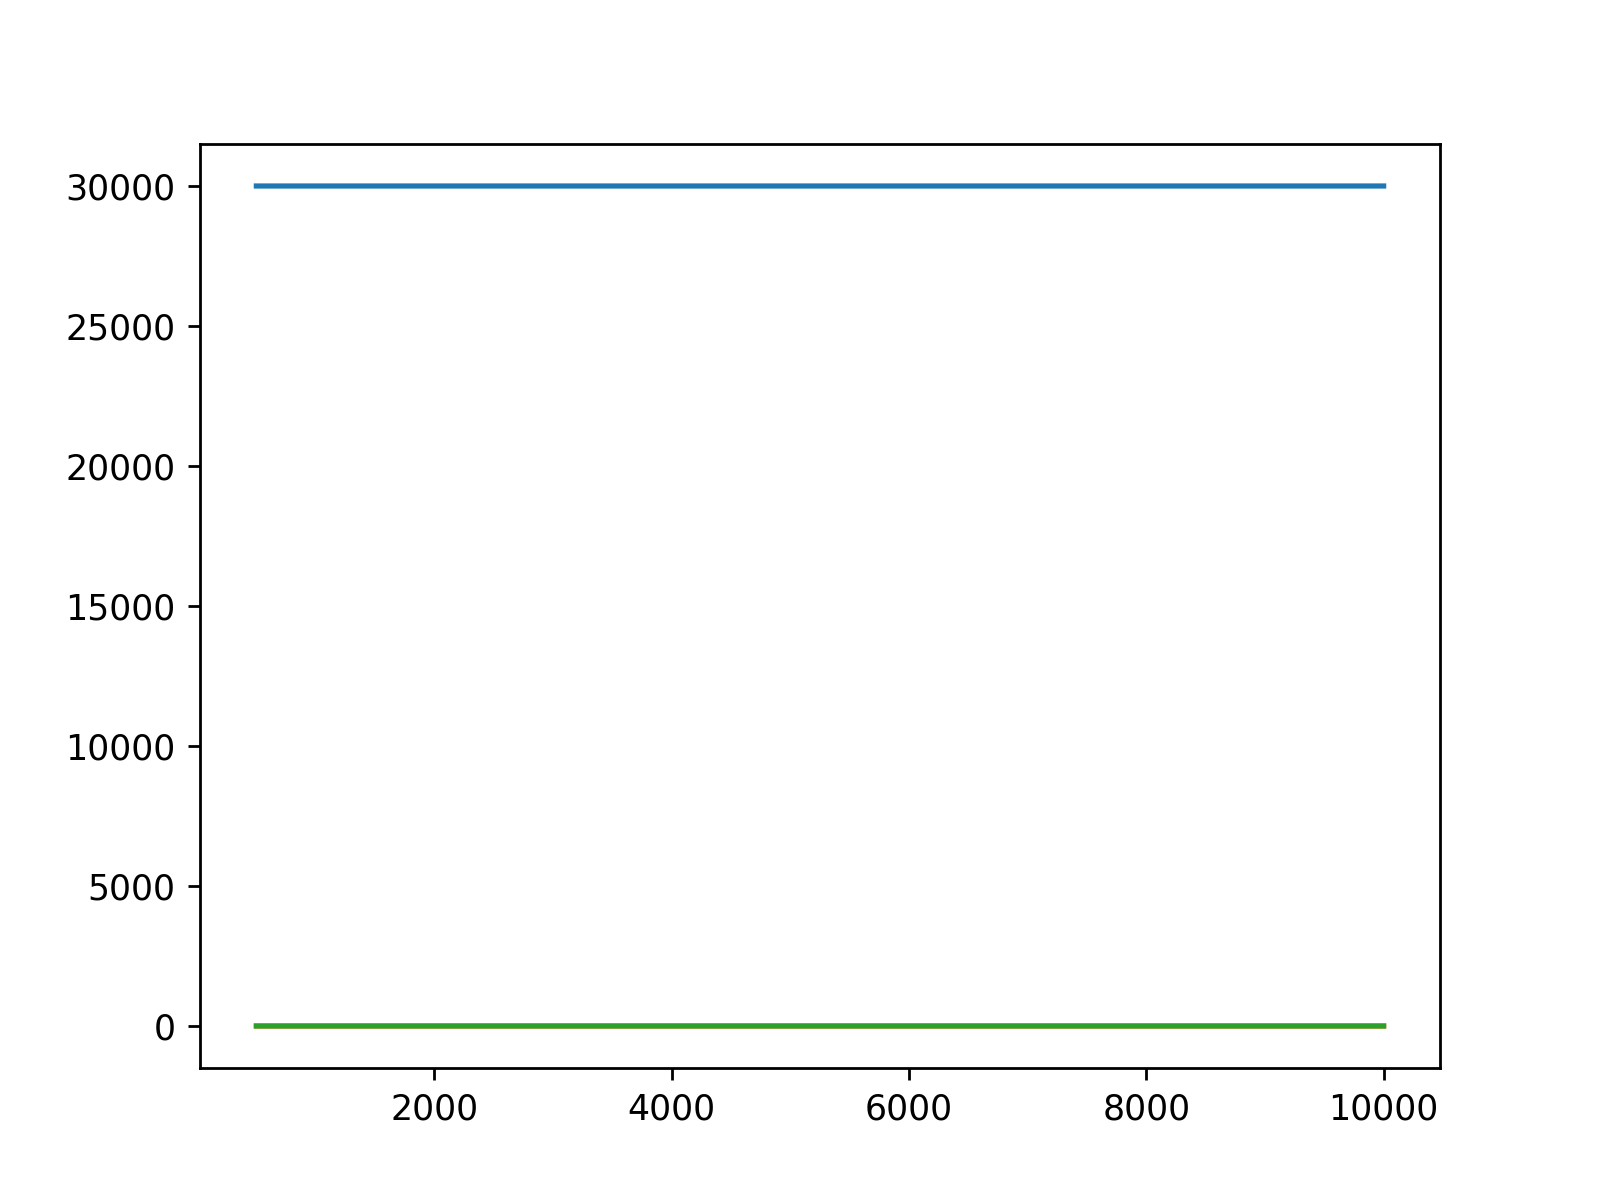

In [28]:
ssv = sll3.y[:,50000:]
np.shape(ssv)

tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


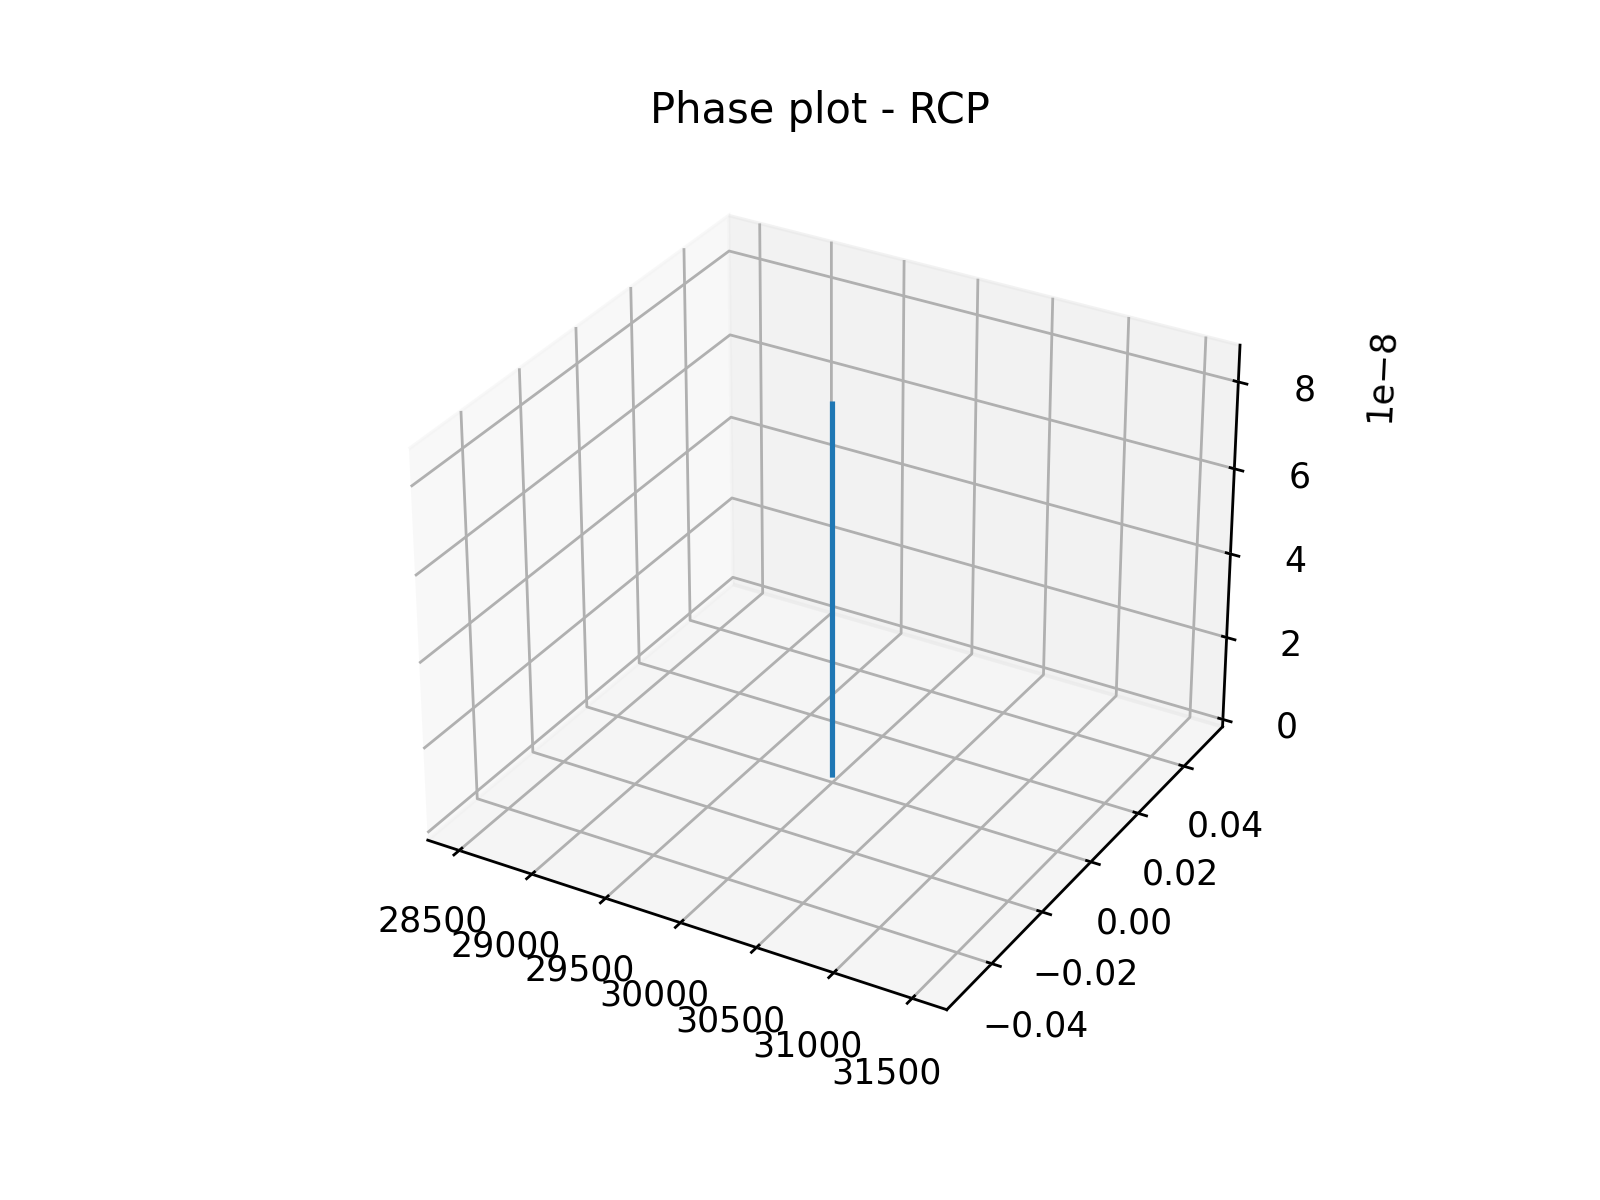

Text(0.5, 0.92, 'Phase plot - RCP')

In [29]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
ax.plot(R, C, P)
ax.set_title("Phase plot - RCP")
#fig.savefig('case3.png')

In [33]:
u0*1e+10
u0[3]

0

In [38]:
start_time = timeit.default_timer()
sll3 = solve_ivp (RCP, t_span, u0*1e+10, args = p, t_eval = tint, method= 'RK45', rtol=1e-09, atol=1e-05)
print(timeit.default_timer() - start_time)

KeyboardInterrupt: 

<IPython.core.display.Javascript object>


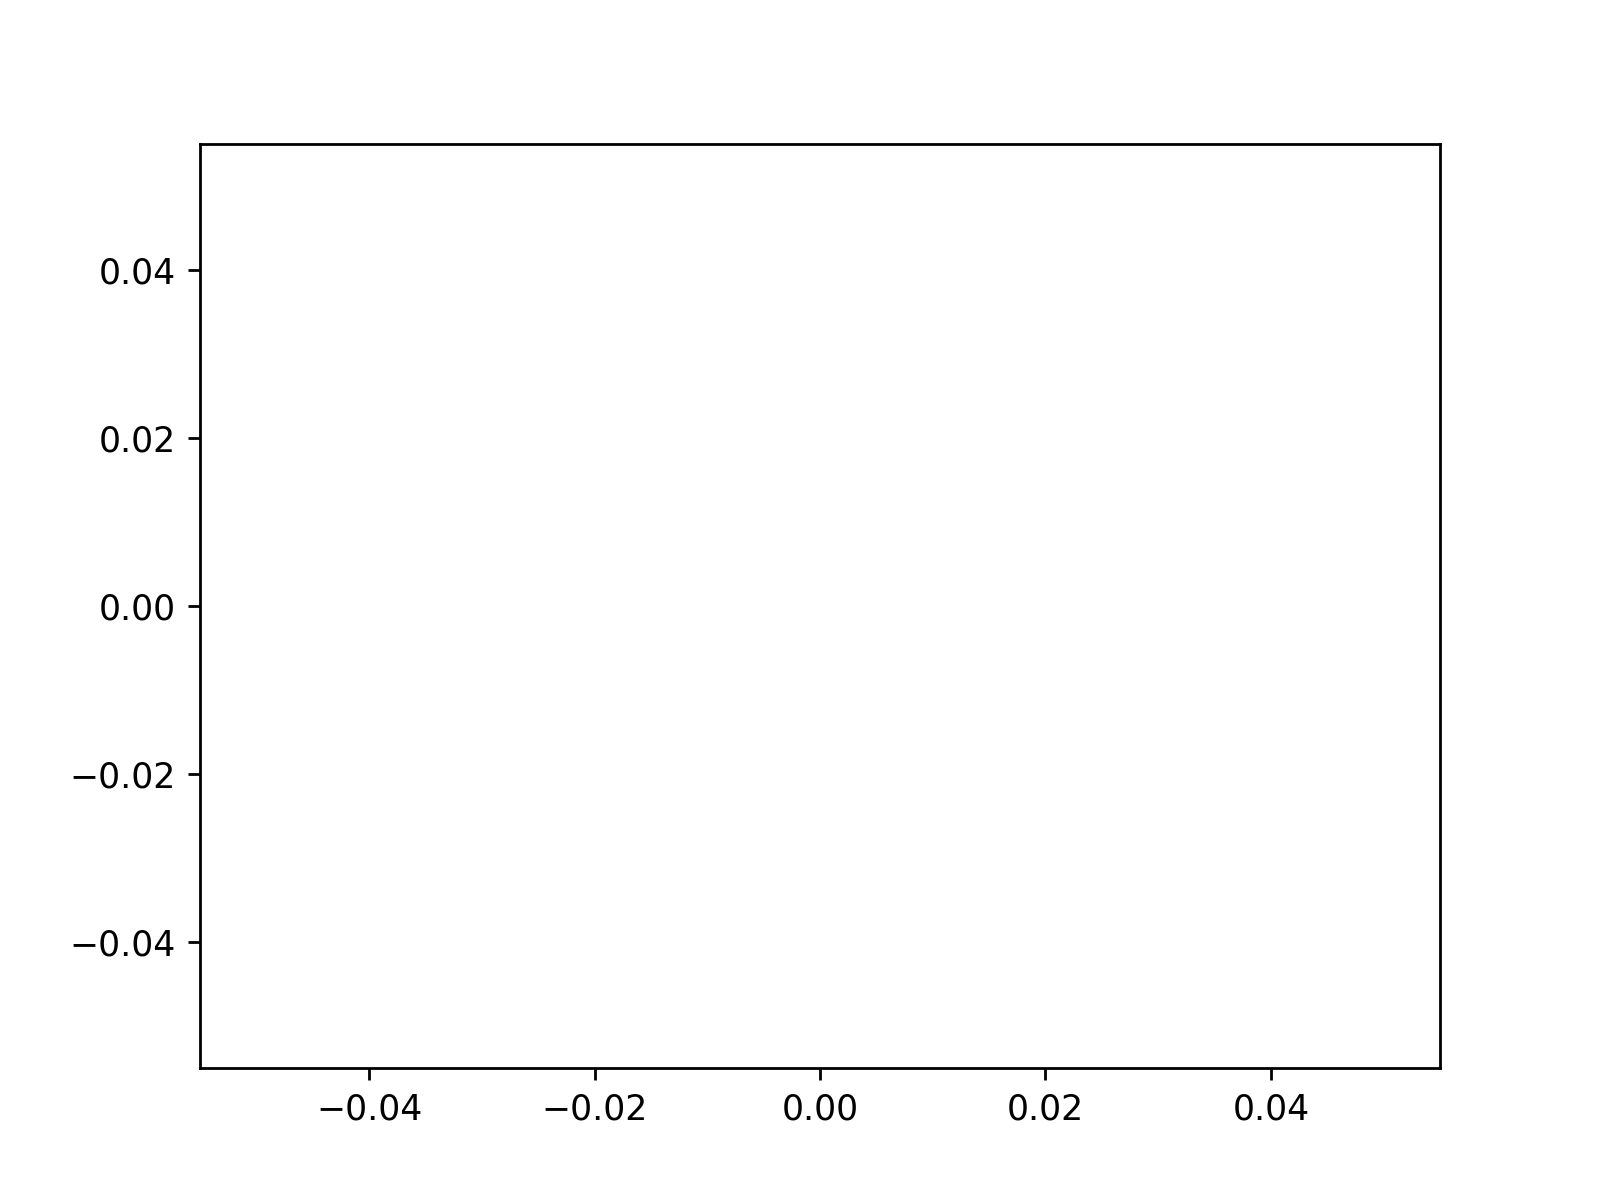

In [37]:
ssv = sll3.y[:,50000:]
np.shape(ssv)

tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

%matplotlib notebook
plt.plot(tm, R)
plt.plot(tm, C)
plt.plot(tm, P)

<IPython.core.display.Javascript object>


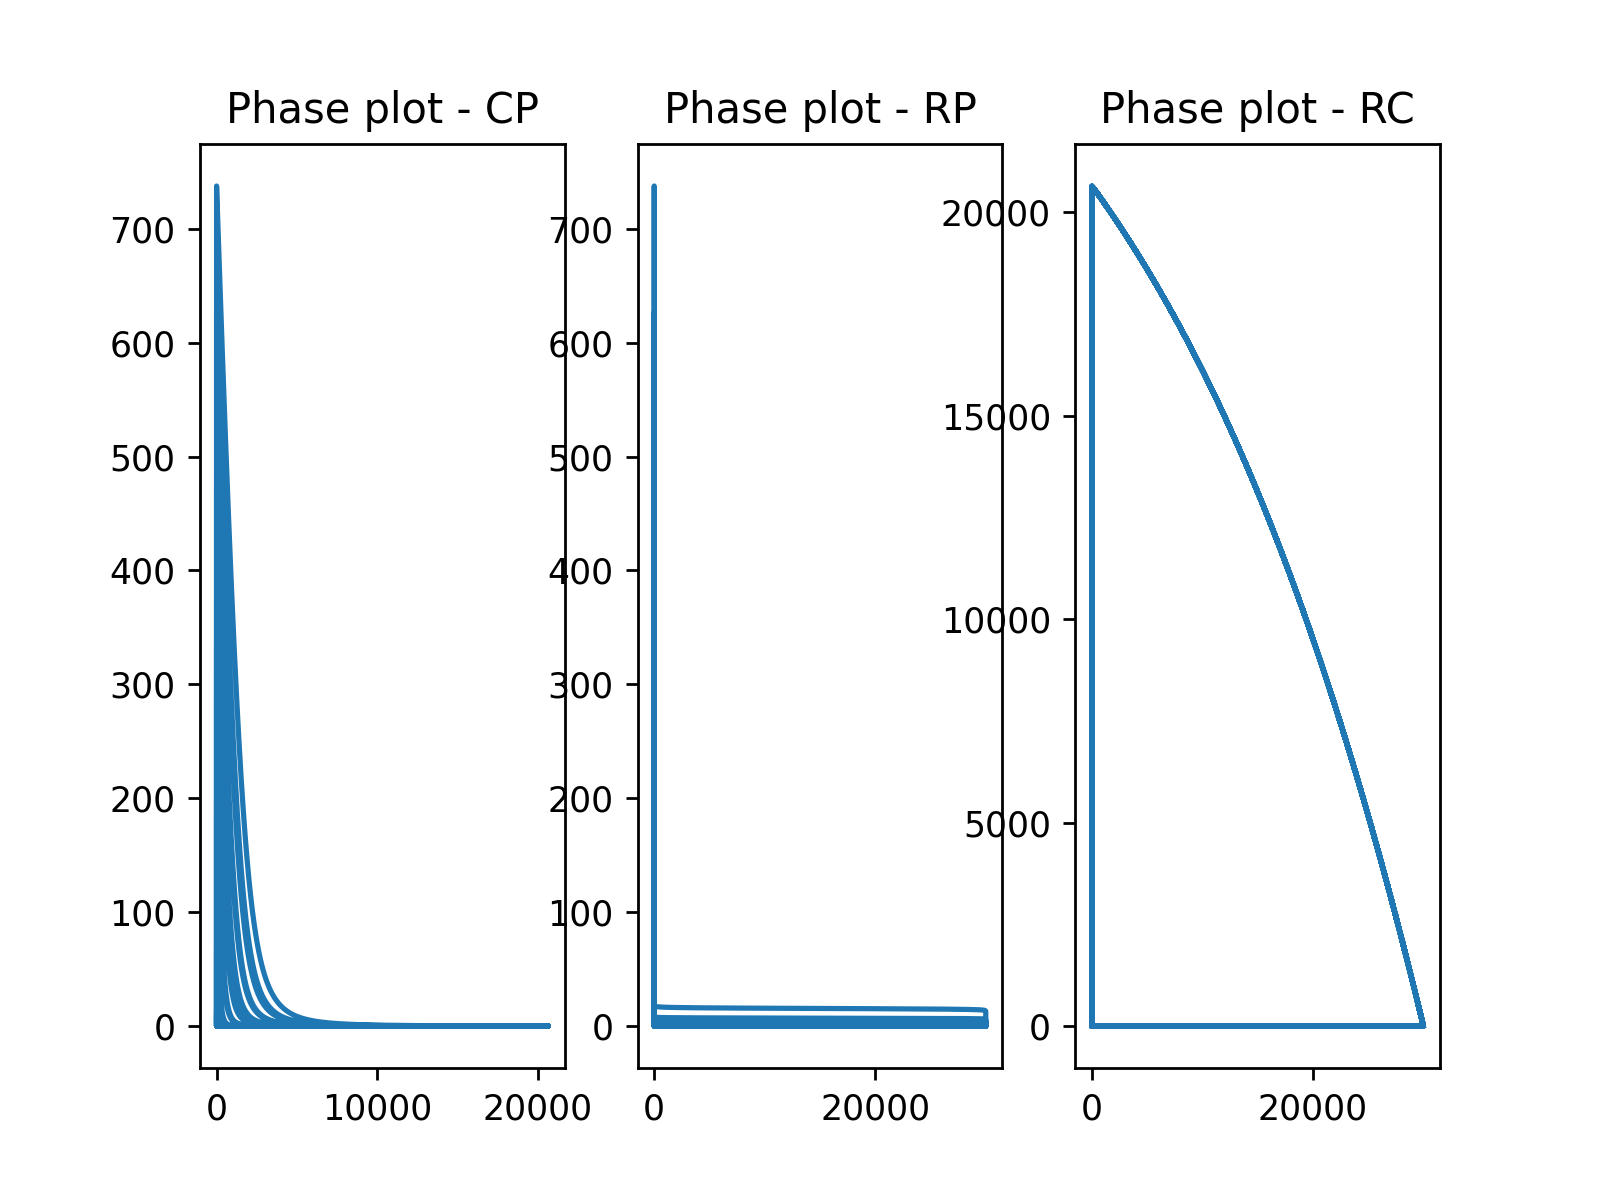

Text(0.5, 1.0, 'Phase plot - RC')

In [16]:
fig = plt.figure()
ax = fig.add_subplot(1,3,1)
ax.plot(C, P)
ax.set_title("Phase plot - CP")

ax = fig.add_subplot(1,3,2)
ax.plot(R, P)
ax.set_title("Phase plot - RP")

ax = fig.add_subplot(1,3,3)
ax.plot(R, C)
ax.set_title("Phase plot - RC")

In [ ]:
plt.savefig('my_plot.png')

In [12]:
ids = np.arange(245002, np.shape(pardf)[0], 3500)
ids

array([245002, 248502, 252002, 255502, 259002, 262502, 266002, 269502,
       273002, 276502, 280002, 283502, 287002, 290502, 294002, 297502,
       301002, 304502, 308002, 311502, 315002, 318502, 322002, 325502,
       329002, 332502, 336002, 339502, 343002, 346502, 350002, 353502,
       357002, 360502, 364002, 367502, 371002, 374502, 378002, 381502,
       385002, 388502, 392002, 395502, 399002, 402502, 406002, 409502,
       413002, 416502, 420002, 423502, 427002, 430502, 434002, 437502,
       441002, 444502, 448002, 451502, 455002, 458502, 462002, 465502,
       469002, 472502, 476002, 479502, 483002, 486502, 490002, 493502,
       497002, 500502, 504002, 507502, 511002, 514502, 518002, 521502,
       525002, 528502, 532002, 535502, 539002, 542502, 546002, 549502,
       553002, 556502, 560002, 563502, 567002, 570502, 574002, 577502,
       581002, 584502, 588002, 591502, 595002, 598502, 602002, 605502,
       609002, 612502])

In [14]:
# for i in ids:
#     flnm = "phase_" + str(i) + ".png"
#     plt_title = "Phase plot - RCP  " + str(i)
    
#     r0 = par[i][0]; q0 = (1/30000)
#     aC0 = par[i][1]; eC0 = par[i][2]; mC0 = par[i][3]; hC0 = par[i][4]
#     aP0 = par[i][5]; eP0 = par[i][6]; mP0 = par[i][7]; hP0 = par[i][8]

#     u0 = np.array([2000, 180, 25, 0])
#     p = (r0, q0, aC0, eC0, hC0, mC0, aP0, eP0, mP0, hP0)

#     tend = 10000
#     t_span = (0, tend)
#     tint = np.linspace(0, tend, tend*10)
    
#     sl2 = solve_ivp (RCP, t_span, u0, args = p, t_eval = tint, method= 'RK45', rtol=1e-14, atol=1e-14)
#     ssv = sl2.y[:,500:]
#     tm = ssv[3]; R = ssv[0]; C = ssv[1]; P = ssv[2]

#     fig = plt.figure()
#     ax = fig.add_subplot(1,1,1, projection='3d')
#     ax.plot(R, C, P)
#     ax.set_title(plt_title)
#     fig.savefig(flnm)
    
#     print(i)
    
    



In [10]:
class A():
    pass
atr = 'x' + str(1)
a = A()
setattr(a, atr, 100)
a.x1  # returns 999

100

In [12]:
b = A()
atr = 'y'+str(1)
setattr(b, atr, 99)
b.y1  # returns 99

99

In [13]:
a.x1 + b.y1

199